Plots: MultipleImageScatter
===========================

This example illustrates how to customize the multiple images plotted over data.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


The multiple images are defined as the unique set of multiple images that are traced from the centre of
every source galaxy in a `Tracer`. These are computed using the `PositionSolver` object.

In [2]:
lens_galaxy = al.Galaxy(
    redshift=0.5,
    mass=al.mp.EllIsothermal(
        centre=(0.0, 0.0), einstein_radius=0.8, elliptical_comps=(0.2, 0.2)
    ),
)

source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge_0=al.lp.SphSersic(
        centre=(0.1, 0.1), intensity=0.3, effective_radius=1.0, sersic_index=2.5
    ),
    bulge_1=al.lp.SphSersic(
        centre=(0.4, 0.3), intensity=0.3, effective_radius=1.0, sersic_index=2.5
    ),
)
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

We also need the `Grid2D` that we can use to make plots of the `Tracer`'s properties.

In [3]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

The multiple images are an internal property of the `Tracer`, so we can plot them via an `Include2D` object.

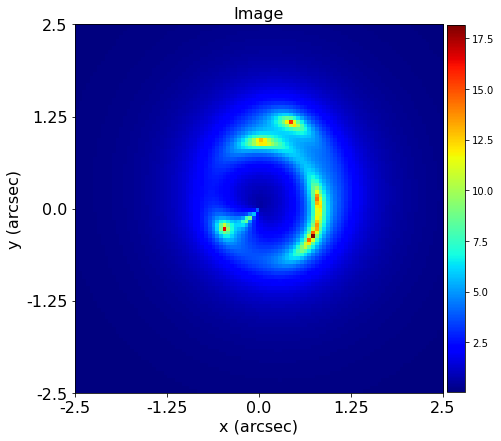

In [4]:
include_2d = aplt.Include2D(
    multiple_images=True,
    light_profile_centres=False,
    mass_profile_centres=False,
    critical_curves=False,
    caustics=False,
)
tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid, include_2d=include_2d)
tracer_plotter.figures_2d(image=True)

The appearance of the multiple images are customized using a `MultipleImagesScatter` object.

To plot the multiple images this object wraps the following matplotlib method:

 https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html

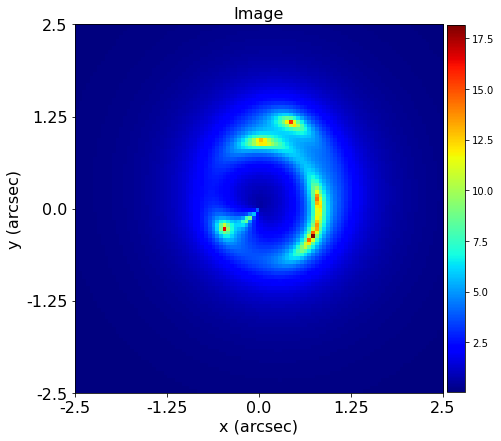

In [5]:
multiple_images_scatter = aplt.MultipleImagesScatter(marker="o", c="r", s=150)

mat_plot_2d = aplt.MatPlot2D(multiple_images_scatter=multiple_images_scatter)

tracer_plotter = aplt.TracerPlotter(
    tracer=tracer, grid=grid, include_2d=include_2d, mat_plot_2d=mat_plot_2d
)
tracer_plotter.figures_2d(image=True)

By specifying two colors to the `MultipleImagesScatter` object the multiple images of each `LightProfile`
would be plotted in different colors (note how the `Galaxy` objects we created above had different redshifts and
each therefore had its own `Plane` in the `Tracer`).

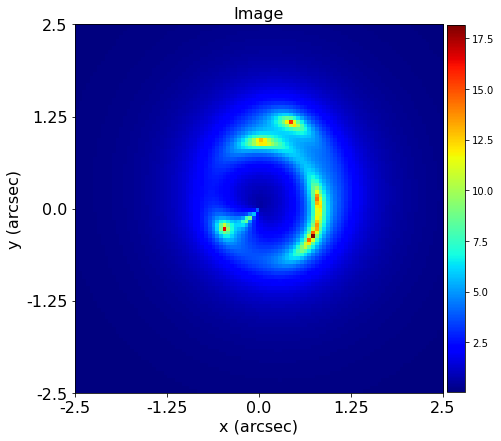

In [6]:
multiple_images_scatter = aplt.MultipleImagesScatter(c=["r", "w"], s=150)

mat_plot_2d = aplt.MatPlot2D(multiple_images_scatter=multiple_images_scatter)

tracer_plotter = aplt.TracerPlotter(
    tracer=tracer, grid=grid, include_2d=include_2d, mat_plot_2d=mat_plot_2d
)
tracer_plotter.figures_2d(image=True)


# """
# To plot the light profile centres manually, we can pass them into a` Visuals2D` object. This is useful for plotting
# the centres on figures where they are not an internal property, like an `Array2D`.
# """
# position_solver = al.PositionsSolver(grid=grid)
# multiple_images = position_solver.solve(lensing_obj=tracer, source_plane_coordinate=(0.1, 0.1))
#
# visuals_2d = aplt.Visuals2D(multiple_images=multiple_images)
# image = tracer.image_2d_from_grid(grid=grid)
#
# array_plotter = aplt.Array2DPlotter(
#     array=image, mat_plot_2d=mat_plot_2d, visuals_2d=visuals_2d
# )
# array_plotter.figure()

Finish.